In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
dat = pd.read_csv("voice-classification.csv")

In [4]:
dat.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [5]:
dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   Q25       3168 non-null   float64
 4   Q75       3168 non-null   float64
 5   IQR       3168 non-null   float64
 6   skew      3168 non-null   float64
 7   kurt      3168 non-null   float64
 8   sp.ent    3168 non-null   float64
 9   sfm       3168 non-null   float64
 10  mode      3168 non-null   float64
 11  centroid  3168 non-null   float64
 12  meanfun   3168 non-null   float64
 13  minfun    3168 non-null   float64
 14  maxfun    3168 non-null   float64
 15  meandom   3168 non-null   float64
 16  mindom    3168 non-null   float64
 17  maxdom    3168 non-null   float64
 18  dfrange   3168 non-null   float64
 19  modindx   3168 non-null   float64
 20  label     3168 non-null   obje

In [6]:
X = dat.drop("label", axis=1)

In [8]:
y= dat["label"]

In [19]:
y.shape

(3168,)

In [9]:
from sklearn.preprocessing import OrdinalEncoder

In [10]:
encoder = OrdinalEncoder()

In [14]:
y_encoded = encoder.fit_transform(dat[["label"]])

In [16]:
y_encoded.shape

(3168, 1)

In [21]:
y_encoded = y_encoded.reshape((3168,))

In [22]:
y_encoded.shape

(3168,)

In [23]:
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=25)

In [27]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(2217, 20) (951, 20) (2217,) (951,)


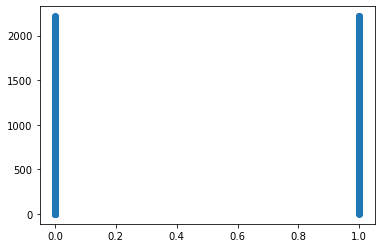

In [33]:
plt.scatter(y_train, np.arange(len(y_train)))

In [43]:
pd.DataFrame(y_train)[0].value_counts()

1.0    1126
0.0    1091
Name: 0, dtype: int64

In [47]:
pd.DataFrame(y_test)[0].value_counts()

0.0    493
1.0    458
Name: 0, dtype: int64

## Train Test Split was good, nearly equal

In [55]:
from sklearn.naive_bayes import GaussianNB

In [56]:
model = GaussianNB()

In [57]:
model.fit(X_train, y_train)

GaussianNB()

In [58]:
y_predicted = model.predict(X_test)

In [59]:
model.score(X_test, y_test)

0.8769716088328076

In [60]:
from sklearn.metrics import confusion_matrix

In [61]:
confusion_matrix(y_test, y_predicted)

array([[424,  69],
       [ 48, 410]], dtype=int64)

## Accuracy is ~87.6 % for the trained Naive Bayes Classifier Model